#  <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;"> <m>Contents:

[Problem 1 - Election data with various models](#Problem_1)
    
    Questions:
[1.1](#1.1)
[1.2](#1.2)
[1.3](#1.3)
[1.4](#1.4)
[1.5](#1.5)
[1.6](#1.6)
[1.7](#1.7)
[1.8](#1.8)
    
[Problem 2 - Text Mining](#Problem_2)
    
    Questions:
[2.1](#2.1)
[2.2](#2.2)
[2.3](#2.3)
[2.4](#2.4)
    

## <span style="font-family: Arial; font-weight:bold;font-size:1em;color:black"> <u> Problem 1 - Election data with various models
<a id='Problem_1'></a>
    
<font color=darkblue>You are hired by one of the leading news channel CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

 </font> 

In [2]:
#Import necessary Libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder                 #Z-score scaling
from sklearn.linear_model import LogisticRegression                            #Logistic Regression model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis           #LDA model
from sklearn.model_selection import train_test_split                           #Train-test split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve, plot_confusion_matrix #Model Evaluation technique
from sklearn.model_selection import GridSearchCV                               #Grid search cross validation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
%matplotlib inline   

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

<b> 1.1) Read the dataset. Do the descriptive statistics and do null value condition check. </b>
<a id='1.1'></a>

In [3]:
#Import the dataset
election = pd.read_excel('Election_data.xlsx', sheet_name= 'Election_Dataset_Two Classes')

In [4]:
election.head(5) #Head of the dataset

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [5]:
#Dropping the column Unnamed: 0 since its index value and not necessary for building the model

election.drop('Unnamed: 0', axis = 1, inplace = True)

In [6]:
# Shape of the dataset
print('There are ',election.shape[0],' rows and ',election.shape[1],' columns in the dataset.' )

There are  1525  rows and  9  columns in the dataset.


In [7]:
election.info() #Information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [8]:
# Check for duplicate records
dup = election.duplicated()
print('There are ', dup.sum(),' records which are duplicates')

There are  8  records which are duplicates


In [9]:
election[dup].head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female


In [10]:
#Drop duplicate records since there is no unique identifier and creating a new DataFrame df without duplicate records
df = election.drop_duplicates()

In [11]:
#Shape of the dataset after removing the duplicates
print('After removing duplicates, there are ',df.shape[0],' rows and ',df.shape[1],' columns in the dataset.' )

After removing duplicates, there are  1517  rows and  9  columns in the dataset.


In [12]:
#Check for null values
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [13]:
#Descriptive statistics for numerical variables
df.describe()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
count,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000
mean,54.241266,3.245221,3.137772,3.335531,2.749506,6.740277,1.540541
std,15.701741,0.881792,0.931069,1.174772,1.232479,3.299043,1.084417
min,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000
50%,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000
75%,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000
max,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000


In [14]:
#Descriptive statistics for object variables
df.describe(include = 'object')

,vote,gender
count,1517,1517
unique,2,2
top,Labour,female
freq,1057,808


In [15]:
#Unique values and count of unique values in each category
cat =['vote','gender']
for column in df[cat]:
    print(column.upper(), ': ', df[column].nunique())
    print(df[column].value_counts().sort_values())
    print(((df[column].value_counts(normalize = True))*100).round(2))
    print('\n')

VOTE :  2
Conservative     460
Labour          1057
Name: vote, dtype: int64
Labour          69.68
Conservative    30.32
Name: vote, dtype: float64


GENDER :  2
male      709
female    808
Name: gender, dtype: int64
female    53.26
male      46.74
Name: gender, dtype: float64




<b> 1.2) Perform EDA (Check the null values, Data types, shape, Univariate, bivariate analysis). Also check for outliers. Interpret the inferences for each  </b>
<a id='1.2'></a>

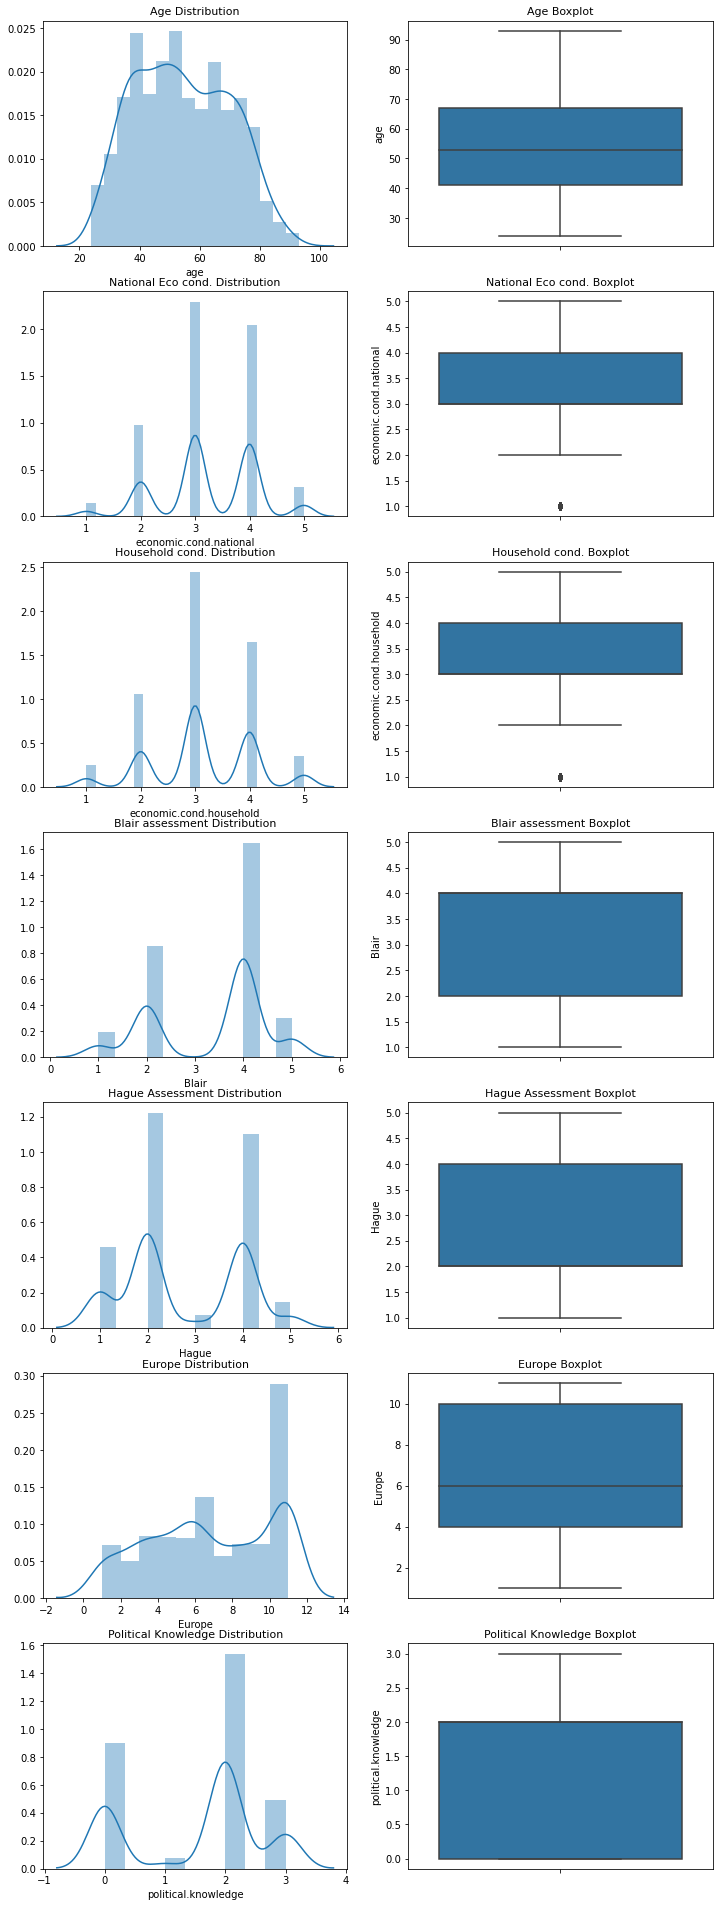

In [16]:
## Univariate Analysis

fig, axes = plt.subplots(nrows=7,ncols=2)
fig.set_size_inches(12, 34)

a = sns.distplot(df.age , ax=axes[0][0])
a.set_title("Age Distribution",fontsize=11)
a = sns.boxplot(df.age , orient = "v" , ax=axes[0][1])
a.set_title("Age Boxplot",fontsize=11)

a = sns.distplot(df['economic.cond.national'], ax=axes[1][0])
a.set_title("National Eco cond. Distribution",fontsize=11)
a = sns.boxplot(df['economic.cond.national'] , orient = "v" , ax=axes[1][1])
a.set_title("National Eco cond. Boxplot",fontsize=11)

a = sns.distplot(df['economic.cond.household'], ax=axes[2][0])
a.set_title("Household cond. Distribution",fontsize=11)
a = sns.boxplot(df['economic.cond.household'], orient = "v" , ax=axes[2][1])
a.set_title("Household cond. Boxplot",fontsize=11)

a = sns.distplot(df.Blair , ax=axes[3][0])
a.set_title("Blair assessment Distribution",fontsize=11)
a = sns.boxplot(df.Blair , orient = "v" , ax=axes[3][1])
a.set_title("Blair assessment Boxplot",fontsize=11)

a = sns.distplot(df.Hague , ax=axes[4][0])
a.set_title("Hague Assessment Distribution",fontsize=11)
a = sns.boxplot(df.Hague , orient = "v" , ax=axes[4][1])
a.set_title("Hague Assessment Boxplot",fontsize=11)

a = sns.distplot(df.Europe , ax=axes[5][0])
a.set_title("Europe Distribution",fontsize=11)
a = sns.boxplot(df.Europe , orient = "v" , ax=axes[5][1])
a.set_title("Europe Boxplot",fontsize=11)

a = sns.distplot(df['political.knowledge'] , ax=axes[6][0])
a.set_title("Political Knowledge Distribution",fontsize=11)
a = sns.boxplot(df['political.knowledge'] , orient = "v" , ax=axes[6][1])
a.set_title("Political Knowledge Boxplot",fontsize=11)
plt.show()

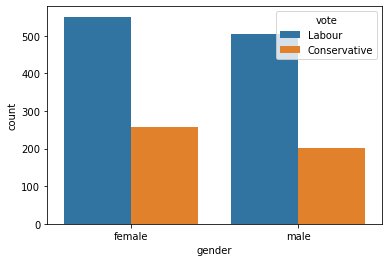

In [17]:
#Bivariate analysis
sns.countplot(df.gender, hue = df.vote);

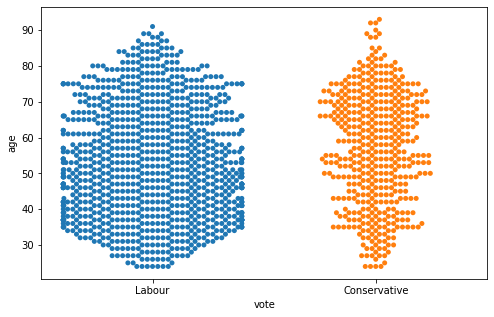

In [20]:
plt.figure(figsize=(8,5))
sns.swarmplot(df["vote"], df['age']) 
plt.show()

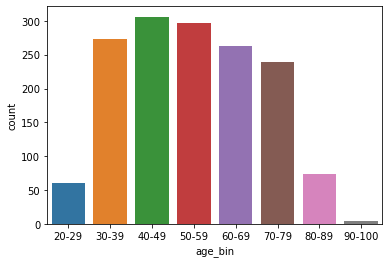

In [21]:
df1 = df.copy()
bins = [20,30,40,50,60,70,80,90,100]
label =['20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-100']
df1['age_bin'] = pd.cut(df1.age,bins,right=False,labels=label)
sns.countplot(df1['age_bin']);

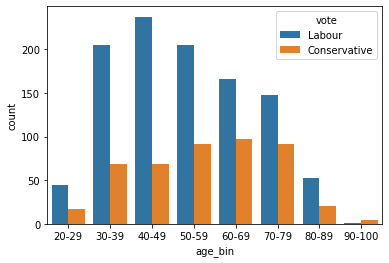

In [22]:
sns.countplot(df1['age_bin'], hue = df1.vote);

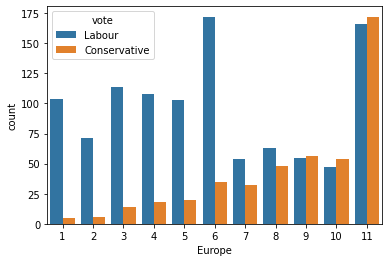

In [24]:
sns.countplot(df.Europe,hue = df.vote);

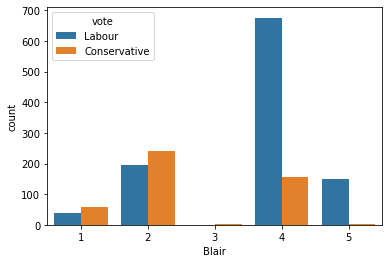

In [28]:
sns.countplot(df.Blair, hue =df.vote);

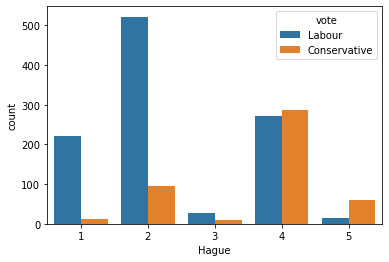

In [29]:
sns.countplot(df.Hague, hue =df.vote);

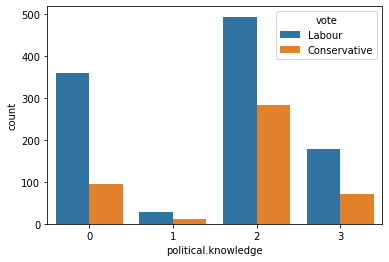

In [30]:
sns.countplot(df['political.knowledge'], hue =df.vote);

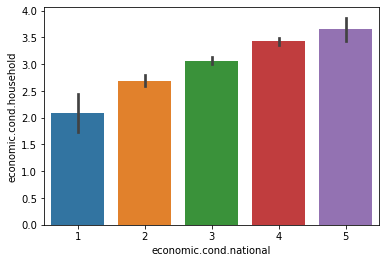

In [31]:
sns.barplot(df['economic.cond.national'], df['economic.cond.household']);

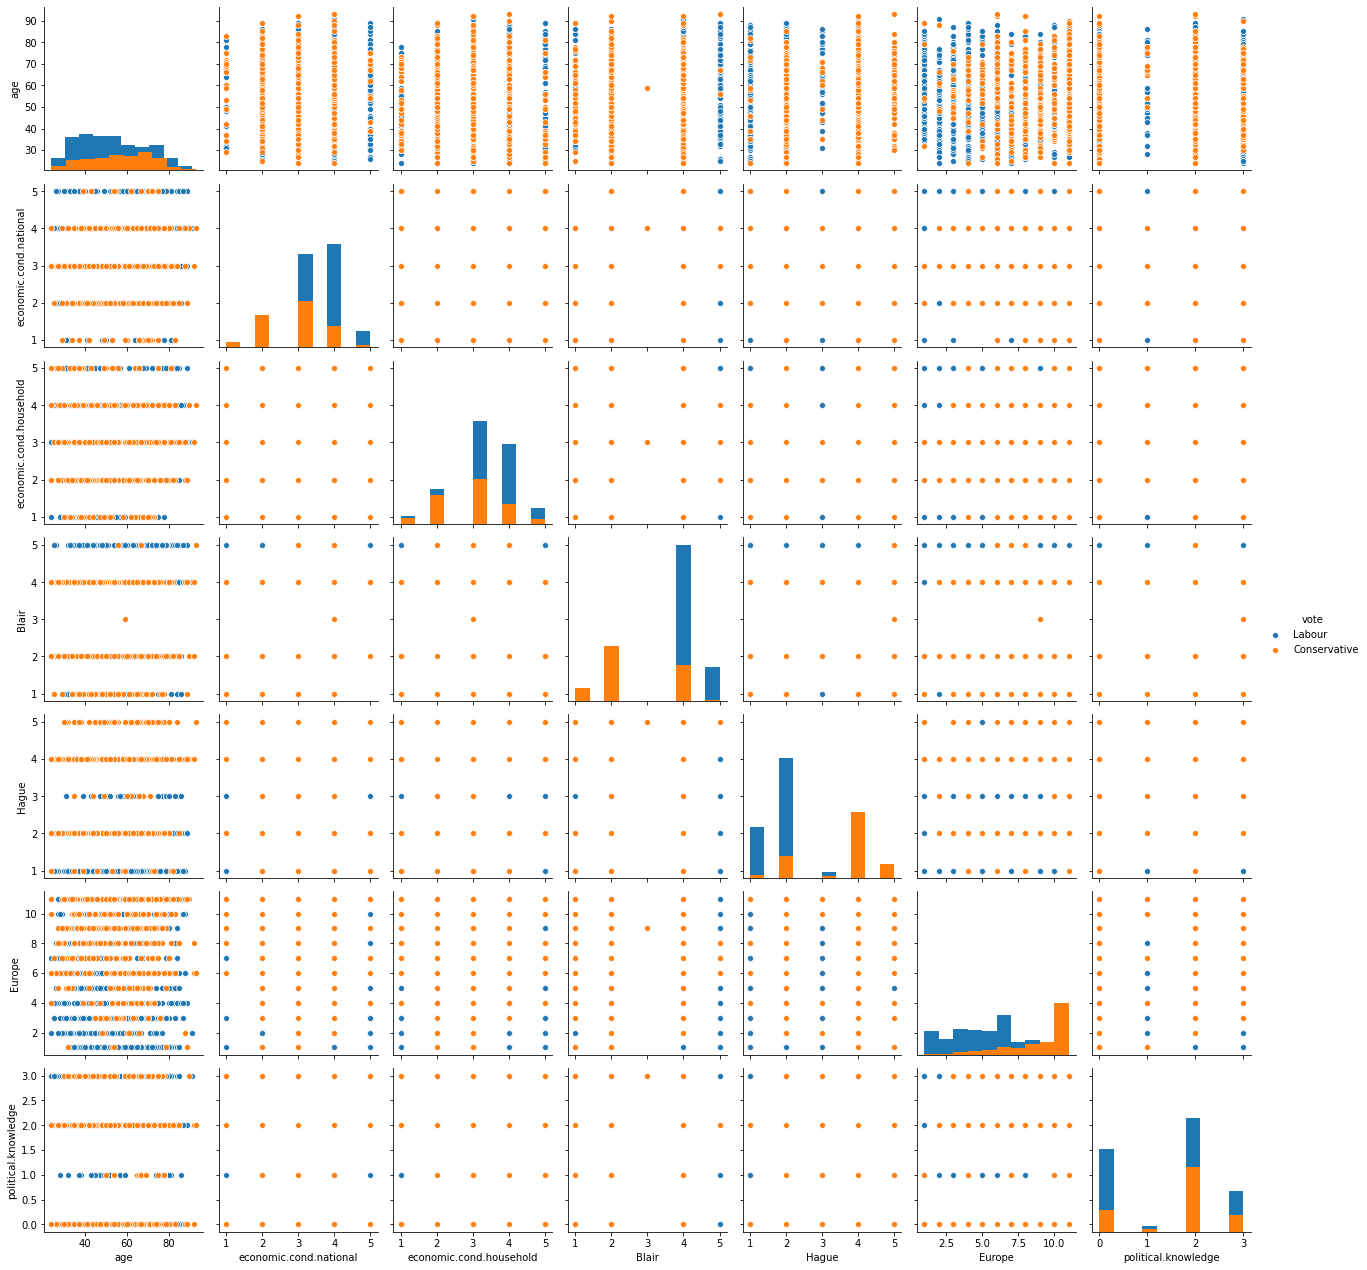

In [32]:
#Multivariate analysis - Pair plot
sns.pairplot(df, hue = 'vote',diag_kind = 'hist');

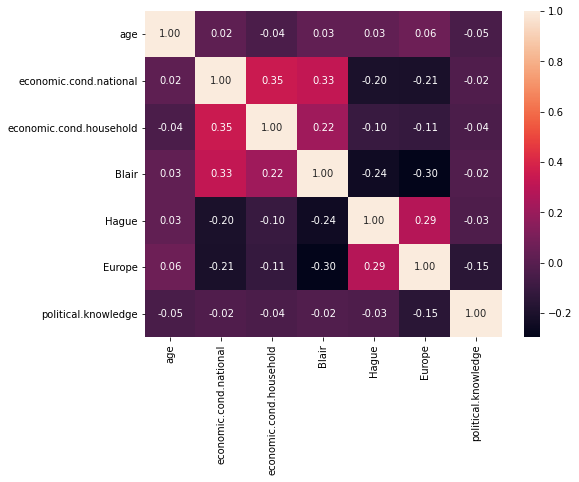

In [33]:
corr = df.corr()
plt.figure(figsize = (8,6))
sns.heatmap(corr, annot = True, fmt ='.2f');

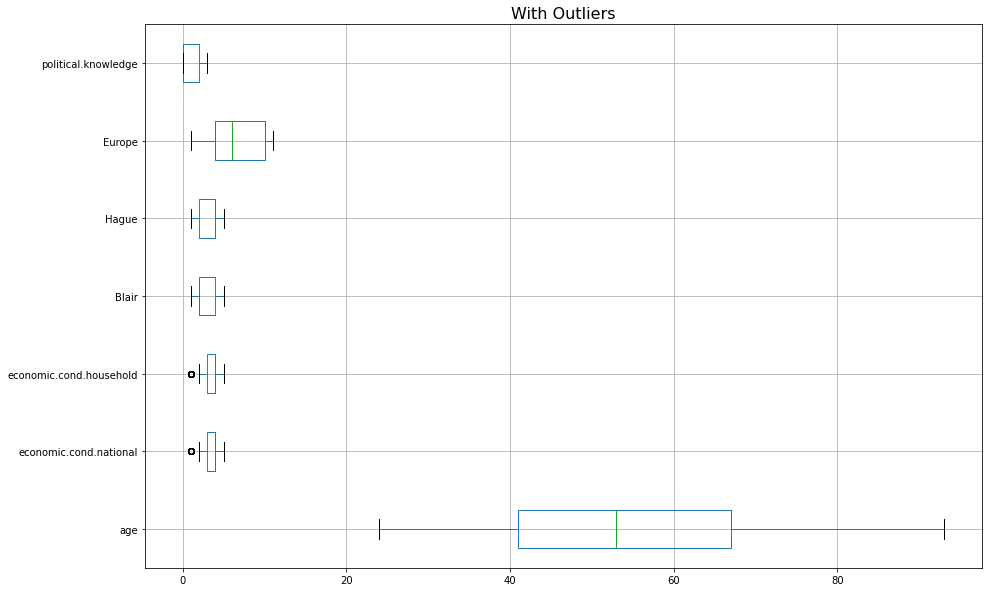

In [34]:
# Outliers check
plt.figure(figsize=(15,10))
df.boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [35]:
df1.dtypes #Dataset with age bins column

vote                         object
age                           int64
economic.cond.national        int64
economic.cond.household       int64
Blair                         int64
Hague                         int64
Europe                        int64
political.knowledge           int64
gender                       object
age_bin                    category
dtype: object

In [36]:
df1.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender,age_bin
0,Labour,43,3,3,4,1,2,2,female,40-49
1,Labour,36,4,4,4,4,5,2,male,30-39
2,Labour,35,4,4,5,2,3,2,male,30-39
3,Labour,24,4,2,2,1,4,0,female,20-29
4,Labour,41,2,2,1,1,6,2,male,40-49


<b> 1.3) Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30). </b>
<a id='1.3'></a>

In [37]:
df1['age_bin'] = df1['age_bin'].astype('object')

In [38]:
df1.dtypes

vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
age_bin                    object
dtype: object

In [41]:
# Encoding the data having string values using pd.Categorical
for feature in df1.columns: 
    if df1[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df1[feature].unique()))
        print(pd.Categorical(df1[feature].unique()).codes)
        df1[feature] = pd.Categorical(df1[feature]).codes



feature: vote
['Labour', 'Conservative']
Categories (2, object): ['Conservative', 'Labour']
[1 0]


feature: gender
['female', 'male']
Categories (2, object): ['female', 'male']
[0 1]


feature: age_bin
['40-49', '30-39', '20-29', '50-59', '70-79', '60-69', '80-89', '90-100']
Categories (8, object): ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-100']
[2 1 0 3 5 4 6 7]


In [42]:
df1.drop('age', axis =1,inplace = True)
df1.head()

,vote,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender,age_bin
0,1,3,3,4,1,2,2,0,2
1,1,4,4,4,4,5,2,1,1
2,1,4,4,5,2,3,2,1,1
3,1,4,2,2,1,4,0,0,0
4,1,2,2,1,1,6,2,1,2


In [43]:
df1.describe()

,vote,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender,age_bin
count,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000
mean,0.696770,3.245221,3.137772,3.335531,2.749506,6.740277,1.540541,0.467370,2.963744
std,0.459805,0.881792,0.931069,1.174772,1.232479,3.299043,1.084417,0.499099,1.604127
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000,0.000000,2.000000
50%,1.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000,0.000000,3.000000
75%,1.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000,1.000000,4.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000,1.000000,7.000000


In [55]:
#Data Split: Split the data into train and test (70:30)

# Copy all the predictor variables into X dataframe
X = df1.drop(['vote','gender'], axis=1)

# Copy target into the y dataframe. 
y = df1['vote']


In [56]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=y)
#statify = y is used to split the dataset into train and test with same proportion of 'yes' and 'no' category as in the original dataset

In [57]:
y_train.value_counts(normalize = True)

1    0.696513
0    0.303487
Name: vote, dtype: float64

In [58]:
y_test.value_counts(normalize = True)

1    0.697368
0    0.302632
Name: vote, dtype: float64

In [59]:
print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)
print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

X_train:  (1061, 7)
y_train:  (1061,)
X_test:  (456, 7)
y_test:  (456,)


<b> 1.4) Apply Logistic Regression and LDA (Linear Discriminant Analysis). Interpret the inferences of both models </b>
<a id='1.4'></a>

###### Logistic Regression

In [60]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.389802
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   vote   No. Observations:                 1517
Model:                          Logit   Df Residuals:                     1510
Method:                           MLE   Df Model:                            6
Date:                Sat, 20 Feb 2021   Pseudo R-squ.:                  0.3647
Time:                        21:21:34   Log-Likelihood:                -591.33
converged:                       True   LL-Null:                       -930.80
Covariance Type:            nonrobust   LLR p-value:                2.163e-143
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
economic.cond.national      0.6187      0.086      7.183      0.000       0.450   

In [63]:
grid={'penalty':['l1','l2','elastic-net','none'],
      'solver':['sag','lbfgs','liblinear','newton-dg','saga'],
      'tol':[0.0001,0.000001]}
#Building the model
model_lg = LogisticRegression(max_iter=10000, verbose = True)
grid_search = GridSearchCV(estimator = model_lg, param_grid = grid, cv = 3,n_jobs=-1,scoring ='f1')
#Fit the model
grid_search.fit(X_train, y_train)
#Finding best parameters
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)
best_model1 = grid_search.best_estimator_
grid_search

convergence after 158 epochs took 0 seconds
{'penalty': 'l1', 'solver': 'saga', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, penalty='l1', solver='saga', verbose=True)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, verbose=True),
             n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2', 'elastic-net', 'none'],
                         'solver': ['sag', 'lbfgs', 'liblinear', 'newton-dg',
                                    'saga'],
                         'tol': [0.0001, 1e-06]},
             scoring='f1')

In [127]:
#Defining a function for predicting model accuracy
def model1(model):

    # Prediction on the training set and testing set
    ytrain_predict = model.predict(X_train)
    ytest_predict = model.predict(X_test)
    
    print('Accuracy of training data: ',(accuracy_score(y_train,ytrain_predict)*100).round(2)) #Training set accuracy
    print('Accuracy of testing data: ',(accuracy_score(y_test,ytest_predict)*100).round(2)) #Testing set accuracy

In [128]:
model1(best_model1)

Accuracy of training data:  82.75
Accuracy of testing data:  85.53


###### LDA

In [66]:
grid={'solver':['svd', 'lsqr', 'eigen'],
      'tol':[0.0001,0.00001]}
#Building the model
model2 = LinearDiscriminantAnalysis()
grid_search = GridSearchCV(estimator = model2, param_grid = grid, cv = 3,n_jobs=-1)
#Fit the model on training data
grid_search.fit(X_train, y_train)
#Finding best parameters
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)
best_model2 = grid_search.best_estimator_
grid_search

{'solver': 'svd', 'tol': 0.0001} 

LinearDiscriminantAnalysis()


GridSearchCV(cv=3, estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [0.0001, 1e-05]})

In [130]:
model1(best_model2)

Accuracy of training data:  82.28
Accuracy of testing data:  85.75


<b> 1.5) Apply KNN Model and Naïve Bayes Model. Interpret the inferences of each model </b>
<a id='1.5'></a>

###### KNN model

In [76]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k, weights ='uniform')
    knn.fit(X_train, y_train)
    # evaluate test accuracy
    scores = knn.score(X_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.20175438596491224,
 0.17763157894736847,
 0.1535087719298246,
 0.14912280701754388,
 0.13377192982456143,
 0.14473684210526316,
 0.13596491228070173,
 0.13815789473684215,
 0.13815789473684215,
 0.14254385964912286]

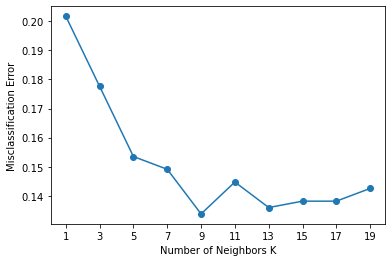

In [77]:
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE, 'o-')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.xticks(np.arange(1,20,2))
plt.show()

In [132]:
#For n neighbors = 9
KNN_model_9=KNeighborsClassifier(n_neighbors=9)
KNN_model_9.fit(X_train,y_train)
model1(KNN_model_9)
KNN_model_9

Accuracy of training data:  85.11
Accuracy of testing data:  86.62


KNeighborsClassifier(n_neighbors=9)

In [80]:
#For n neighbors = 13
KNN_model=KNeighborsClassifier(n_neighbors=13)
KNN_model.fit(X_train,y_train)
model1(KNN_model)

Accuracy of training data:  0.8426013195098964
Accuracy of testing data:  0.8640350877192983


###### Naive Bayes Model

In [134]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)
model1(NB_model)
NB_model

Accuracy of training data:  82.19
Accuracy of testing data:  85.31


GaussianNB()

<b> 1.6) Model Tuning, Bagging and Boosting. </b>
<a id='1.6'></a>

###### Random Forest

In [83]:
#Creating grid search for finding out optimal number of values for the hyper parameter

param_grid1 = {
    'max_depth': [4,5,10],
    'max_features': [3,4,5],
    'min_samples_leaf': [30,40,50],
    'min_samples_split': [90,120,150], 
    'n_estimators': [60,80,100]
}

rfcl = RandomForestClassifier(random_state=1)

grid_search_rfcl = GridSearchCV(estimator = rfcl, param_grid = param_grid1, cv = 10)

#Finding the best parameters for proceeding with the model
grid_search_rfcl.fit(X_train, y_train)
print(grid_search_rfcl.best_params_)
best_model3 = grid_search_rfcl.best_estimator_


{'max_depth': 4, 'max_features': 5, 'min_samples_leaf': 40, 'min_samples_split': 90, 'n_estimators': 80}


In [86]:
grid_search_rfcl

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [4, 5, 10], 'max_features': [3, 4, 5],
                         'min_samples_leaf': [30, 40, 50],
                         'min_samples_split': [90, 120, 150],
                         'n_estimators': [60, 80, 100]})

In [136]:
model1(best_model3)

Accuracy of training data:  81.53
Accuracy of testing data:  83.77


In [137]:
#Feature importance
print (pd.DataFrame(best_model3.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                              Imp
Hague                    0.447773
Blair                    0.215286
Europe                   0.209883
political.knowledge      0.092982
economic.cond.national   0.017865
age_bin                  0.011345
economic.cond.household  0.004867


###### Bagging

In [87]:
Bagging_model=BaggingClassifier(n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(n_estimators=100, random_state=1)

In [139]:
model1(Bagging_model)

Accuracy of training data:  98.96
Accuracy of testing data:  81.14


###### Ada Boost model

In [148]:
ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [149]:
model1(ADB_model)

Accuracy of training data:  83.22
Accuracy of testing data:  83.99


###### Gradient Boost model

In [150]:
gbcl = GradientBoostingClassifier(random_state=1, n_estimators = 50)
gbcl.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=50, random_state=1)

In [151]:
model1(gbcl)

Accuracy of training data:  85.96
Accuracy of testing data:  84.21


<b> 1.7) Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model - Compare all models on the basis of the performance metrics in a structured tabular manner. Describe on which model is best/optimized </b>
<a id='1.7'></a>

In [124]:
def performance(model,xtrain,ytrain,xtest,ytest):
    # Prediction on the training set and testing set
    ytrain_predict = model.predict(xtrain) 
    ytest_predict = model.predict(xtest)
    # Getting the probabilities on the train set and  test set
    ytrain_predict_prob=model.predict_proba(xtrain)
    ytest_predict_prob=model.predict_proba(xtest)
    
    # AUC and ROC for the training data
    # calculate AUC
    auc = roc_auc_score(ytrain,ytrain_predict_prob[:,1])
    print('AUC for the Training Data: %.3f' % auc)
    #  calculate roc curve
    fpr, tpr, thresholds = roc_curve(ytrain,ytrain_predict_prob[:,1])
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    plt.plot(fpr, tpr, marker='.',label = 'Training Data')
    # AUC and ROC for the test data
    # calculate AUC
    auc = roc_auc_score(ytest,ytest_predict_prob[:,1])
    print('AUC for the Test Data: %.3f' % auc)
    #  calculate roc curve
    fpr, tpr, thresholds = roc_curve(ytest,ytest_predict_prob[:,1])
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    plt.plot(fpr, tpr, marker='.',label='Test Data')
    # show the plot
    plt.legend(loc='best')
    plt.show()
    
    f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False, figsize =(12,6))
    #Plotting confusion matrix for the training and testing data
    plot_0 = sns.heatmap((confusion_matrix(ytrain,ytrain_predict)),annot=True,fmt='.5g',ax=a[0][0]);
    a[0][0].set_title('Training Data')
    plot_1 = sns.heatmap((confusion_matrix(ytest,ytest_predict)),annot=True,fmt='.5g',ax=a[0][1]);
    a[0][1].set_title('Test Data');
    
    print('Classification Report of the training data:\n\n',classification_report(ytrain, ytrain_predict),'\n')
    print('Classification Report of the test data:\n\n',classification_report(ytest, ytest_predict),'\n')   

###### Performance metrics for training and testing set of Logistic Regression model

AUC for the Training Data: 0.877
AUC for the Test Data: 0.913


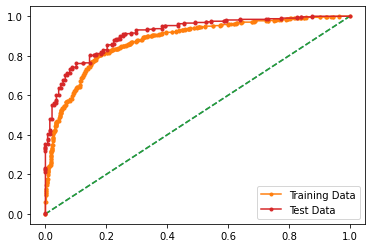

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.74      0.66      0.70       322
           1       0.86      0.90      0.88       739

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.82      0.83      0.82      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.81      0.68      0.74       138
           1       0.87      0.93      0.90       318

    accuracy                           0.86       456
   macro avg       0.84      0.81      0.82       456
weighted avg       0.85      0.86      0.85       456
 



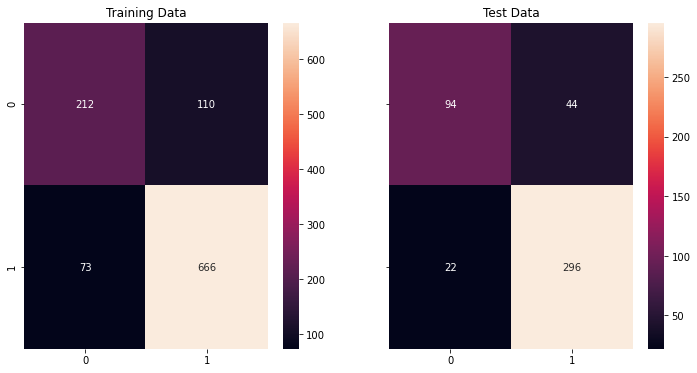

In [129]:
performance(best_model1,X_train,y_train,X_test,y_test)

###### Performance metrics for training and testing set of LDA model

AUC for the Training Data: 0.877
AUC for the Test Data: 0.915


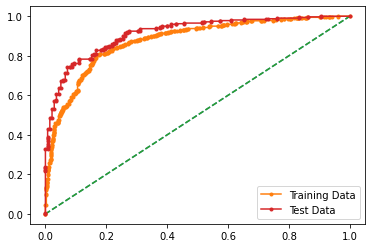

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.72      0.67      0.70       322
           1       0.86      0.89      0.87       739

    accuracy                           0.82      1061
   macro avg       0.79      0.78      0.79      1061
weighted avg       0.82      0.82      0.82      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.80      0.70      0.75       138
           1       0.88      0.92      0.90       318

    accuracy                           0.86       456
   macro avg       0.84      0.81      0.82       456
weighted avg       0.85      0.86      0.85       456
 



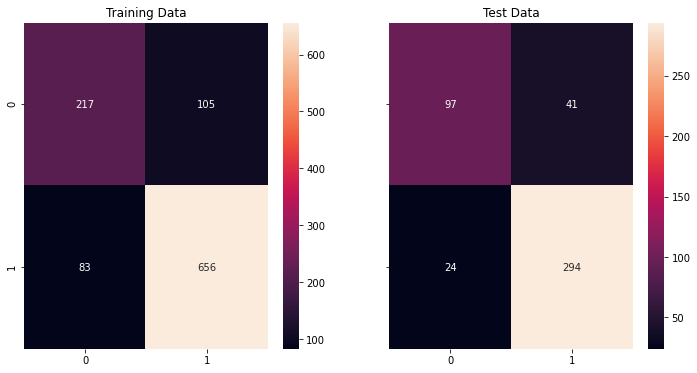

In [131]:
performance(best_model2,X_train,y_train,X_test,y_test)

###### Performance metrics for training and testing set of KNN model with n = 9

AUC for the Training Data: 0.915
AUC for the Test Data: 0.900


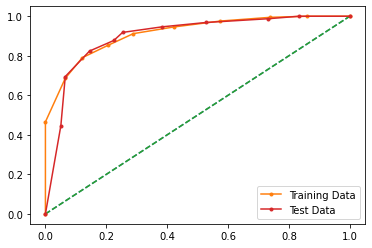

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.78      0.71      0.74       322
           1       0.88      0.91      0.90       739

    accuracy                           0.85      1061
   macro avg       0.83      0.81      0.82      1061
weighted avg       0.85      0.85      0.85      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.80      0.75      0.77       138
           1       0.89      0.92      0.91       318

    accuracy                           0.87       456
   macro avg       0.85      0.83      0.84       456
weighted avg       0.86      0.87      0.86       456
 



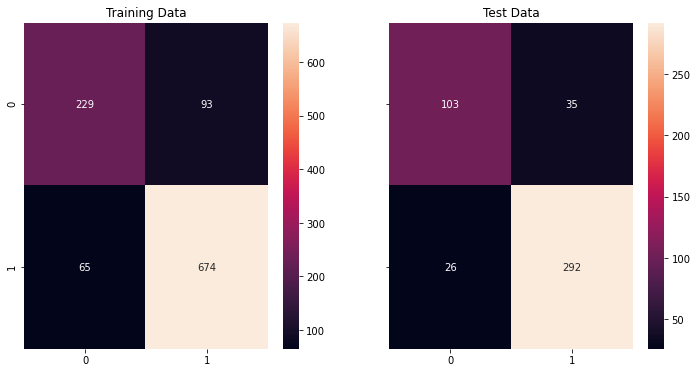

In [133]:
performance(KNN_model_9,X_train,y_train,X_test,y_test)

###### Performance metrics for training and testing set of Naives Bayes model

AUC for the Training Data: 0.874
AUC for the Test Data: 0.912


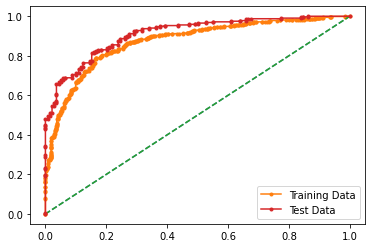

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.71      0.70      0.70       322
           1       0.87      0.88      0.87       739

    accuracy                           0.82      1061
   macro avg       0.79      0.79      0.79      1061
weighted avg       0.82      0.82      0.82      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.78      0.72      0.75       138
           1       0.88      0.91      0.90       318

    accuracy                           0.85       456
   macro avg       0.83      0.81      0.82       456
weighted avg       0.85      0.85      0.85       456
 



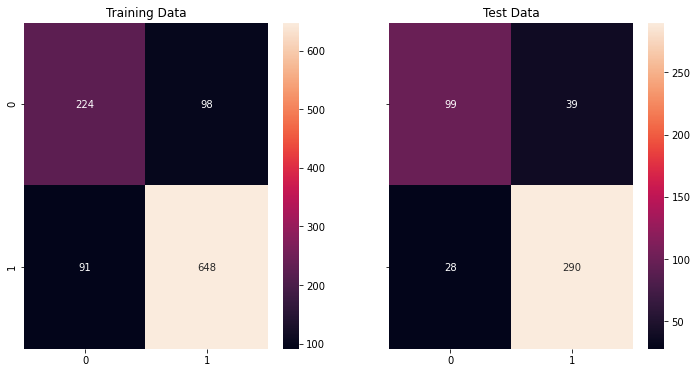

In [135]:
performance(NB_model,X_train,y_train,X_test,y_test)

###### Performance metrics for training and testing set of Random forest 

AUC for the Training Data: 0.883
AUC for the Test Data: 0.910


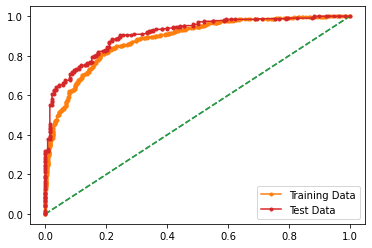

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.75      0.59      0.66       322
           1       0.84      0.91      0.87       739

    accuracy                           0.82      1061
   macro avg       0.79      0.75      0.77      1061
weighted avg       0.81      0.82      0.81      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.81      0.61      0.69       138
           1       0.85      0.94      0.89       318

    accuracy                           0.84       456
   macro avg       0.83      0.77      0.79       456
weighted avg       0.83      0.84      0.83       456
 



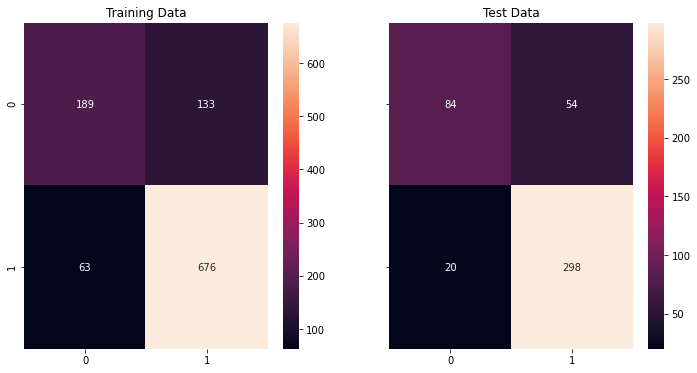

In [138]:
performance(best_model3,X_train,y_train,X_test,y_test)

###### Performance metrics for training and testing set of Bagging model

AUC for the Training Data: 0.999
AUC for the Test Data: 0.870


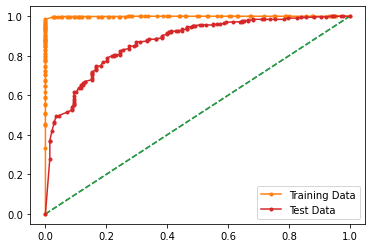

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.99      0.98      0.98       322
           1       0.99      0.99      0.99       739

    accuracy                           0.99      1061
   macro avg       0.99      0.99      0.99      1061
weighted avg       0.99      0.99      0.99      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.72      0.62      0.66       138
           1       0.84      0.90      0.87       318

    accuracy                           0.81       456
   macro avg       0.78      0.76      0.77       456
weighted avg       0.81      0.81      0.81       456
 



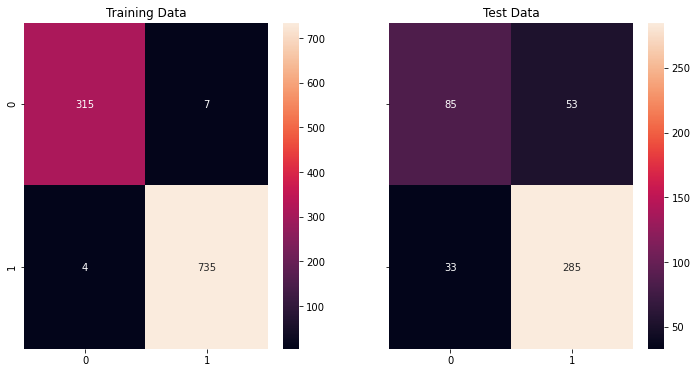

In [140]:
performance(Bagging_model,X_train,y_train,X_test,y_test)

###### Performance metrics for training and testing set of AdaBoost model

AUC for the Training Data: 0.894
AUC for the Test Data: 0.911


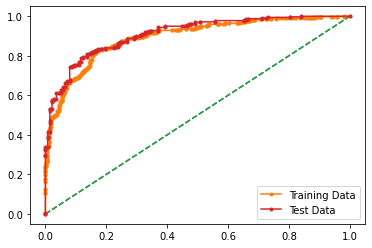

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.74      0.69      0.71       322
           1       0.87      0.89      0.88       739

    accuracy                           0.83      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.83      0.83      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.76      0.68      0.72       138
           1       0.87      0.91      0.89       318

    accuracy                           0.84       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.84      0.84      0.84       456
 



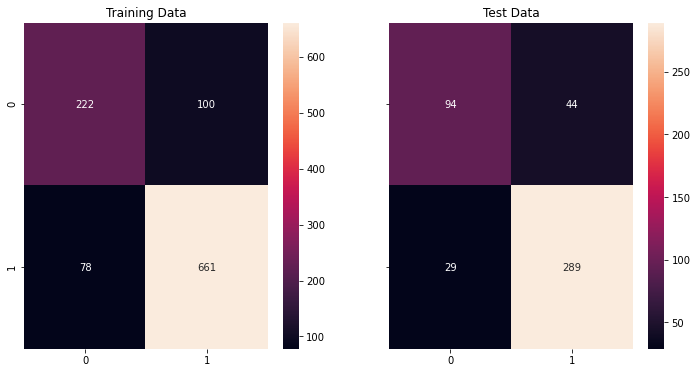

In [152]:
performance(ADB_model,X_train,y_train,X_test,y_test)

###### Performance metrics for training and testing set of Gradient boost model

AUC for the Training Data: 0.926
AUC for the Test Data: 0.913


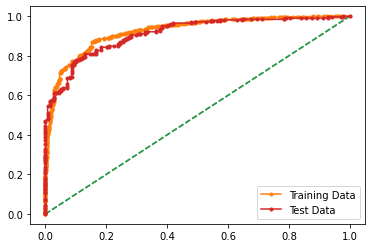

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.79      0.73      0.76       322
           1       0.89      0.92      0.90       739

    accuracy                           0.86      1061
   macro avg       0.84      0.82      0.83      1061
weighted avg       0.86      0.86      0.86      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.77      0.68      0.72       138
           1       0.87      0.91      0.89       318

    accuracy                           0.84       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.84      0.84      0.84       456
 



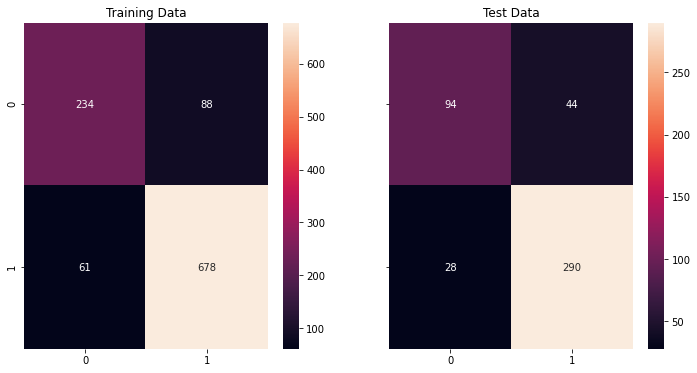

In [153]:
performance(gbcl,X_train,y_train,X_test,y_test)

<b> 1.8) Based on your analysis and working on the business problem, detail out appropriate insights and recommendations to help the management solve the business objective. </b>
<a id='1.8'></a>

Insights from the model:


        •	70% of the data points are in ‘Labour’ vote category and 30% of the data points are in ‘Conservative’ voting category. Since the data points are not well balanced between the categories, model accuracy score cannot be reliable performance measure. 
        •	Since both the classes predictions are important, we are using F1 score as a performance metric which gives a balance between recall and precision.
        •	Out of all the models, KNN has performed consistently with both training and testing data.
    
    
Our business problem is to predict which party a voter will vote for.


        •	False positive (FP) - Datapoints that are actually false but predicted as true.  This is also known as type 1 error. In order to reduce the type 1 error, we have to increase the precision of the model (among the points identified as positives by the model how many are actually positive). 
        Type 1 error in this case study means model has classified the data point as Labour party instead of Conservative party. 
        •	False negative (FN) – Datapoints that are actually true but predicted as false. This is known as type 2 error. In order to reduce to type 2 error. We have to increase recall (how many actual true data points are identified as true by the model)
         Type 2 error for our case study means the model has classified the data point as Conservative party instead of Labour party. 
         
         
Both False positives and false negatives are important for this election case study since the goal of the problem is to correctly identity which party the vote goes to. Since there is a trade off between this FP and FN, F1 score is considered which balances the trade-off. If precision is low, the F1 is low and if the recall is low again F1 score will be low.
Correctly predicting the vote will improve the overall accuracy as well. 


KNN model gives an F1 score of 0.77 for conservative class and 0.91 for labour class. Given that there are more data points with labour votes, F1 score for that class is higher.


Recommendations for the business:


    Goal of the news channel is to telecast the right information to their viewers. In order to predict the votes correctly, exit poll should contain questions which can determine the votes. It becomes crucial in order to estimate the results of the election.
    Assuming it’s the day 1 of elections, with the data collected we can say that Labour party is in the lead and that the party is in favour of the integration of Europe and Britain. Voters who chose this party are also aware of the integration. However, if we had data from all centres and from different locations, this prediction can change. The KNN model built using the dataset will be effective even for new data coming in.
    Here we have built model with 7 independent variables for predicting the ‘vote’ dependent variable. Exit polls have consistently been reliable sources to gather demographic information of voters. Since voting is always anonymous, exit polls are the sole source to gather demographic details and other information such as reasons why the voter voted for a particular candidate.
    
    
    
        •	Including some more information like education, income, family status, living status, religion, employment status would be even more helpful in order to weigh the sentiment of the voters with respect to the party they might vote for.
        •	Based on the assumption made, conducting this exit poll for the entire course of the election by the news channel will be effective. Any lapse in time could lead to highly biased data.
        •	Collecting exit polls from various platforms like online, form filling can increase the accuracy of predictions. 
        •	In case a few voters refuse participation, the researcher can collect their details such as sex and approximate age of the voter. These values can be considered while statistical analysis of collected data to reduce response bias as much as possible.


## <span style="font-family: Arial; font-weight:bold;font-size:1em;color:black"> <u> Problem 2 - Text Mining
<a id='Problem_1'></a>
    
<font color=darkblue>In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

President Franklin D. Roosevelt in 1941
President John F. Kennedy in 1961
President Richard Nixon in 1973

 </font> 

In [111]:
#Import necessary libraries

import nltk
import string
from nltk.corpus import stopwords
nltk.download('inaugural')
from nltk.corpus import inaugural

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


In [112]:
inaugural.fileids() #All the speeches in the inaugural corpus

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [113]:
#Extracting the three speeches

speech1 = inaugural.raw('1941-Roosevelt.txt')
speech2 = inaugural.raw('1961-Kennedy.txt')
speech3 = inaugural.raw('1973-Nixon.txt')


In [114]:
fileid = ['1941-Roosevelt.txt','1961-Kennedy.txt','1973-Nixon.txt']

In [115]:
fileid

['1941-Roosevelt.txt', '1961-Kennedy.txt', '1973-Nixon.txt']

<b> 2.1) Find the number of characters, words and sentences for the mentioned documents. (Hint: use .words(), .raw(), .sent() for extracting counts) </b>
<a id='2.1'></a>

In [116]:
for x in inaugural.fileids():
    if x in fileid:
        num_chars = len(inaugural.raw(x))
        num_words = len(inaugural.words(x))
        num_sents = len(inaugural.sents(x))
        print('Speech: ',x,'\n\tChar_count: ', num_chars,'Word_count: ', num_words,'Sent_count: ', num_sents)


Speech:  1941-Roosevelt.txt 
	Char_count:  7571 Word_count:  1536 Sent_count:  68
Speech:  1961-Kennedy.txt 
	Char_count:  7618 Word_count:  1546 Sent_count:  52
Speech:  1973-Nixon.txt 
	Char_count:  9991 Word_count:  2028 Sent_count:  69


In [117]:
df = pd.DataFrame({'speech': [speech1,speech2,speech3]})
df

,speech
0,On each national day of inauguration since 178...
1,"Vice President Johnson, Mr. Speaker, Mr. Chief..."
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus..."


<b> 2.2) Remove all the stopwords from the three speeches. </b>
<a id='2.2'></a>

In [118]:
#Lower case conversion
df['speech'] = df['speech'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['speech'][0]

'on each national day of inauguration since 1789, the people have renewed their sense of dedication to the united states. in washington\'s day the task of the people was to create and weld together a nation. in lincoln\'s day the task of the people was to preserve that nation from disruption from within. in this day the task of the people is to save that nation and its institutions from disruption from without. to us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. if we do not, we risk the real peril of inaction. lives of nations are determined not by the count of years, but by the lifetime of the human spirit. the life of a man is three-score years and ten: a little more, a little less. the life of a nation is the fullness of the measure of its will to live. there are men who doubt this. there are men who believe that democracy, as a form of 

In [119]:
#Defining stop words in english and punctuation
stopwords = nltk.corpus.stopwords.words('english') 
stopwords.extend(["--",'let','us','mr'])

df['speech'] = df['speech'].str.replace('[^\w\s]','') #Removing punctuations
df['speech'] = df['speech'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwords)) #Removing stopwords
df['speech'] = df['speech'].str.replace('[0-9]','') #Removing numerics
df['speech'][1]

'vice president johnson speaker chief justice president eisenhower vice president nixon president truman reverend clergy fellow citizens observe today victory party celebration freedom symbolizing end well beginning signifying renewal well change sworn almighty god solemn oath forebears l prescribed nearly century three quarters ago world different man holds mortal hands power abolish forms human poverty forms human life yet revolutionary beliefs forebears fought still issue around globe belief rights man come generosity state hand god dare forget today heirs first revolution word go forth time place friend foe alike torch passed new generation americans born century tempered war disciplined hard bitter peace proud ancient heritage unwilling witness permit slow undoing human rights nation always committed committed today home around world every nation know whether wishes well ill shall pay price bear burden meet hardship support friend oppose foe order assure survival success liberty m

<b> 2.3) Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords) </b>
<a id='2.3'></a>

In [120]:
for i in range(0,3):
    freq = pd.Series(df['speech'][i].split()).value_counts()[:3]
    print('Top three words in speech ', i, '\n',freq)

Top three words in speech  0 
 nation    11
know      10
spirit     9
dtype: int64
Top three words in speech  1 
 world    8
sides    8
new      7
dtype: int64
Top three words in speech  2 
 peace    19
world    16
new      15
dtype: int64


<b> 2.4) Plot the word cloud of each of the three speeches. (after removing the stopwords)</b>
<a id='2.4'></a>

Word Cloud for 1941-Roosevelt.txt


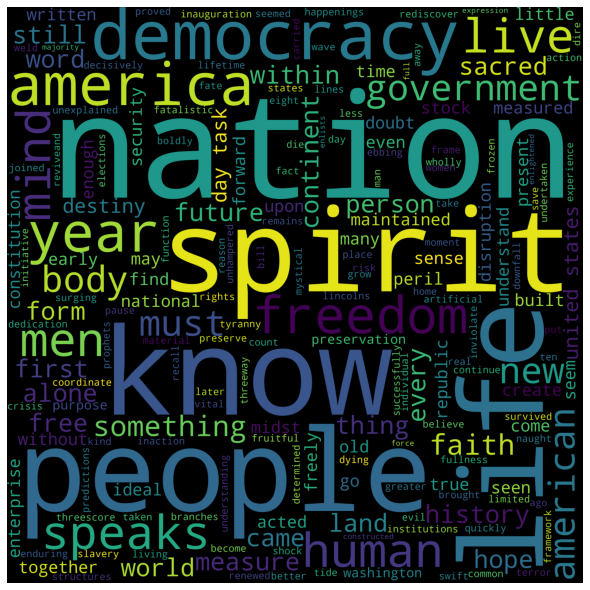

In [121]:
# Word Cloud for Speech 0
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(df['speech'][0]) 
  
# plot the WordCloud image                        
plt.figure(figsize = (10, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for 1941-Roosevelt.txt")
plt.show()

Word Cloud for 1961-Kennedy.txt


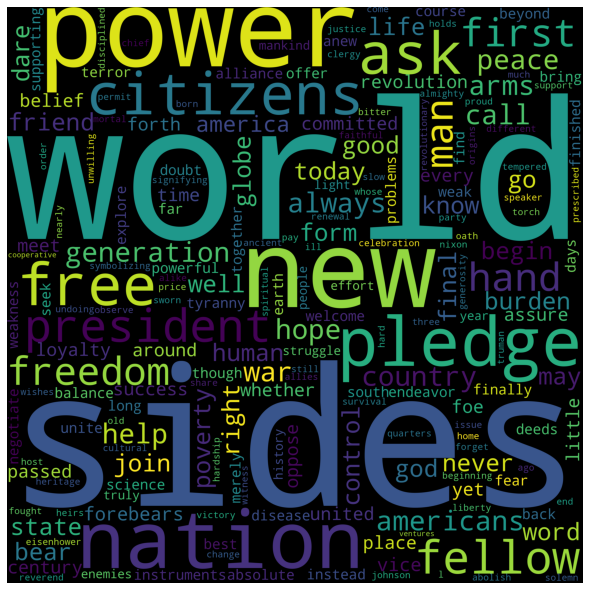

In [122]:
# Word Cloud for Speech 1
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(df['speech'][1]) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for 1961-Kennedy.txt")
plt.show()

Word Cloud for 1973-Nixon.txt


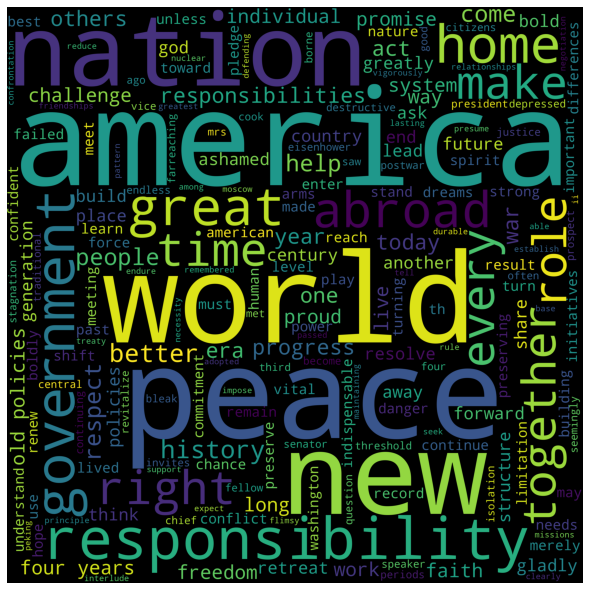

In [123]:
# Word Cloud for Speech 2
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(df['speech'][2]) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for 1973-Nixon.txt")
plt.show()